In [130]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import pydot

In [78]:
df_carseats = pd.read_csv("../data/Carseats.csv", index_col=0)
df_carseats.head(n=10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
9,6.54,132,110,0,108,124,Medium,76,10,No,No
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [79]:
df_carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


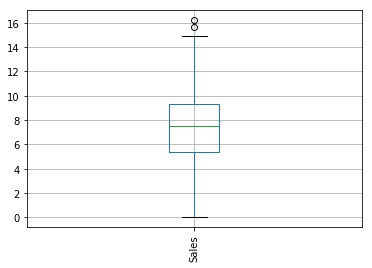

In [80]:
df_carseats.boxplot(column=['Sales'],rot=90)

In [26]:
df_carseats[df_carseats['Sales'] <= 8].shape

(236, 11)

In [93]:
df_carseats['High'] = df_carseats['Sales'].apply(lambda sales_value: 1 if sales_value >= 8 else 0)
df_carseats[['Sales', 'High']].head(10)

,Sales,High
1,9.50,1
2,11.22,1
3,10.06,1
4,7.40,0
5,4.15,0
6,10.81,1
7,6.63,0
8,11.85,1
9,6.54,0
10,4.69,0


#### Encoding of Categorical Values.
> Unlike R, sklearn decision trees do not handle categorical data - see sklearn Issue #5442.

> We need to encode the categorical data using LabelEncoder (for Ordinal values) (or) OneHotEncoder (for categorical values) before using sklearn decision trees

In [87]:
# 'ShelveLoc' is Ordinal categorical variable. 
print(df_carseats.ShelveLoc.unique())

['Bad' 'Good' 'Medium']


In [90]:
#cannot specify the order you want for a ordinal category using LabelEncoder
#le = LabelEncoder()
#le.transform(df_carseats['ShelveLoc']) 
#le.classes_

df_carseats['ShelveLoc_encoded'] = df_carseats['ShelveLoc'].map( {'Bad':0, 'Medium':1, 'Good':2})
df_carseats[['ShelveLoc', 'ShelveLoc_encoded']].head(n=10)

,ShelveLoc,ShelveLoc_encoded
1,Bad,0
2,Good,2
3,Medium,1
4,Medium,1
5,Bad,0
6,Bad,0
7,Medium,1
8,Good,2
9,Medium,1
10,Medium,1


In [91]:
# 'Urban' an 'US' are categorical variables. 

df_carseats = pd.concat([df_carseats, pd.get_dummies(df_carseats['Urban'], prefix='Urban')], axis=1)
df_carseats = pd.concat([df_carseats, pd.get_dummies(df_carseats['US'], prefix='US')], axis=1)

df_carseats.head(n=10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_encoded,Urban_No,Urban_Yes,US_No,US_Yes
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0,1,0,1
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,2,0,1,0,1
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,0,1,0,1
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1,0,1,0,1
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0,1,1,0
6,10.81,124,113,13,501,72,Bad,78,16,No,Yes,0,1,0,0,1
7,6.63,115,105,0,45,108,Medium,71,15,Yes,No,1,0,1,1,0
8,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,2,0,1,0,1
9,6.54,132,110,0,108,124,Medium,76,10,No,No,1,1,0,1,0
10,4.69,132,113,0,131,124,Medium,76,17,No,Yes,1,1,0,0,1


In [146]:
feature_cols = df_carseats.columns.difference(['High', 'Sales', 'ShelveLoc', 'Urban', 'US'])

X = df_carseats[feature_cols]
y = df_carseats.High
print(X.columns)

Index(['Advertising', 'Age', 'CompPrice', 'Education', 'Income', 'Population',
       'Price', 'ShelveLoc_encoded', 'US_No', 'US_Yes', 'Urban_No',
       'Urban_Yes'],
      dtype='object')


In [154]:
model_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

In [155]:
model_clf.fit(X,y).score(X,y)

0.7925

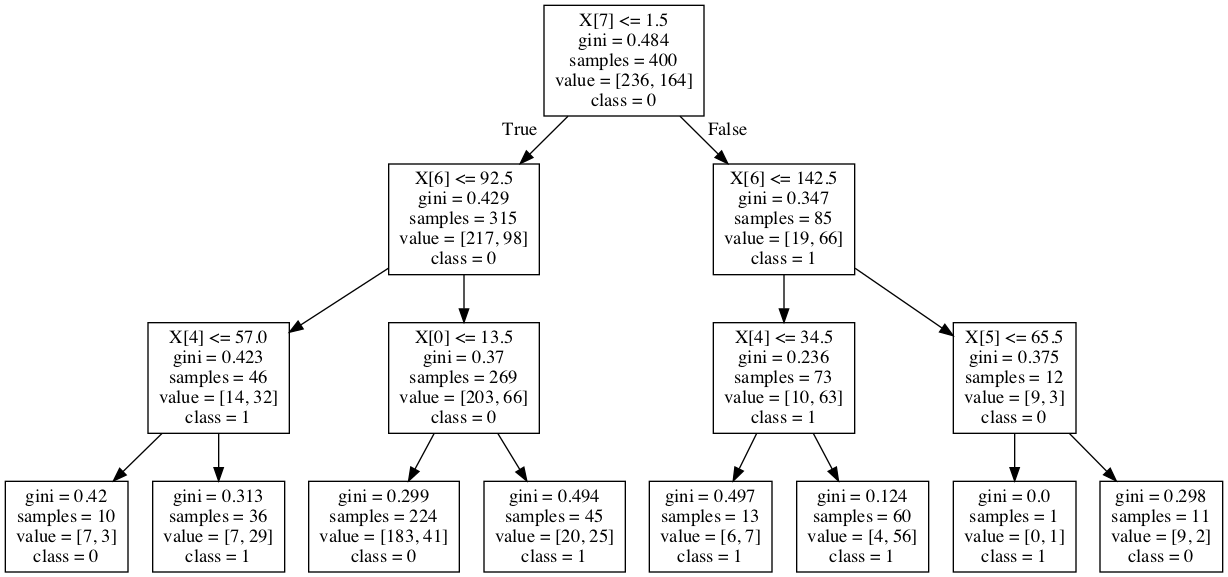

In [156]:
data_dot = tree.export_graphviz(model_clf, out_file=None, class_names=['0', '1'])
graph= pydot.graph_from_dot_data(data_dot)
Image(graph[0].create_png())

In [149]:
model_clf.tree_.node_count

111